In [80]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
# allow plots to appear directly in the notebook
%matplotlib inline

### Question 5

In [81]:
# read data into a DataFrame
wbdr = pd.read_stata('wbdr.dta')

In [91]:
wbdr.head(10)

,code,country,illit_f,illit_m,illit_t,mort_inf,mort_5,gnppc,gnppcppp,mort77,gnppc77,gnch
0,1.0,Afghanistan,82.0,52.0,67.0,151.0,226.0,NaN,NaN,183.0,NaN,0
1,NaN,Albania,NaN,NaN,NaN,26.0,40.0,757.0,2170.0,50.0,NaN,0
2,NaN,Algeria,52.0,27.0,40.0,32.0,39.0,1409.0,4250.0,112.0,1540.0,0
3,NaN,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,Andorra,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,0
5,NaN,Angola,NaN,NaN,NaN,125.0,209.0,159.0,820.0,161.0,NaN,0
6,NaN,Antigua and Barbuda,NaN,NaN,NaN,17.0,21.0,7331.0,8650.0,NaN,NaN,0
7,NaN,Argentina,4.0,3.0,4.0,22.0,24.0,8755.0,10100.0,39.0,8379.0,1
8,NaN,Armenia,NaN,NaN,NaN,15.0,NaN,896.0,2540.0,NaN,NaN,0
9,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [83]:
# shape of the DataFrame
wbdr.shape

(210, 11)

In [84]:
wbdr.describe()

,code,illit_f,illit_m,illit_t,mort_inf,mort_5,gnppc,gnppcppp,mort77,gnppc77
count,1.0,138.000000,138.000000,138.000000,195.000000,177.000000,160.000000,150.000000,166.000000,119.000000
mean,1.0,25.376812,16.434782,20.949276,41.169231,62.485874,5340.887695,6534.866699,71.704819,5641.722656
std,NaN,26.209768,17.892605,21.786392,38.404617,64.375854,9307.990234,7113.654785,53.221916,8356.346680
min,1.0,0.000000,0.000000,0.000000,4.000000,5.000000,112.000000,410.000000,8.000000,129.000000
25%,1.0,4.000000,2.000000,3.000000,10.500000,14.000000,442.500000,1582.500000,23.250000,542.500000
50%,1.0,15.000000,9.000000,14.000000,24.000000,33.000000,1430.500000,3775.000000,55.000000,1557.000000
75%,1.0,42.500000,26.000000,33.000000,65.500000,101.000000,4011.750000,7760.000000,113.750000,7445.000000
max,1.0,93.000000,78.000000,86.000000,170.000000,286.000000,46448.000000,29230.000000,263.000000,38314.000000


In [85]:
#Question5 (a)
#a table of summery statistics
wbdr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 11 columns):
code        1 non-null float32
country     210 non-null object
illit_f     138 non-null float32
illit_m     138 non-null float32
illit_t     138 non-null float32
mort_inf    195 non-null float32
mort_5      177 non-null float32
gnppc       160 non-null float32
gnppcppp    150 non-null float32
mort77      166 non-null float32
gnppc77     119 non-null float32
dtypes: float32(10), object(1)
memory usage: 11.5+ KB


In [86]:
#percentage of data is missing in each variables
wbdr.isna().mean().round(4) * 100

code        99.52
country      0.00
illit_f     34.29
illit_m     34.29
illit_t     34.29
mort_inf     7.14
mort_5      15.71
gnppc       23.81
gnppcppp    28.57
mort77      20.95
gnppc77     43.33
dtype: float64

我認為遺漏資料太多會 interfere my further analysis on the data

In [87]:
#(b)
wbdr["gnch"]=0
a=wbdr["gnppc77"].median()
def dummy1(df):
    if df["gnppc77"]> a:
        df["gnch"]=1
    else:
        df["gnch"]=0
    return df
wbdr=wbdr.apply(dummy1,axis=1)        

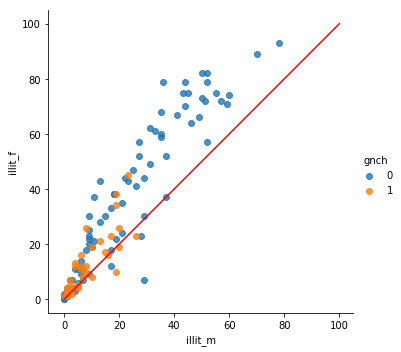

In [88]:
sns.lmplot(x='illit_m', y='illit_f', hue="gnch",data=wbdr,fit_reg=False)
plt.plot(np.linspace(0,100,1000), np.linspace(0,100,1000), 'r')

(i)所得較高的國家 不識字的比率都較低，而所得較低的國家 不識字的比率較高，這符合我的預期，因為所得越高，就越有機會受教育，因此不識字的比率就會隨之降低

(ii) female’s illiterate rate tends to be higher，可能的解釋為性別不平等，通常是男性才有受教育的權利，也因此造成女性不識字的比率較高

In [89]:
#(C)
results = smf.ols('illit_t ~ gnppc77 ', data=wbdr).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                illit_t   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     26.73
Date:                Wed, 16 Oct 2019   Prob (F-statistic):           1.20e-06
Time:                        23:24:55   Log-Likelihood:                -448.40
No. Observations:                 102   AIC:                             900.8
Df Residuals:                     100   BIC:                             906.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.1696      2.399     12.159      0.0

the coefficient on per capita GNP ：-0.0012
and its standard error：0.000566
告訴我 如果所得越高的話，可以讓不識字率 平均來說下降0.0012單位，也跟我原本的預期一樣
t statistics 為-5.171，而p value為零，這告訴我的確 gnppc77 是有影響不識字率的。

In [90]:
#(d)
results1 = smf.ols('mort77 ~ gnppc77 ', data=wbdr).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                 mort77   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     55.48
Date:                Wed, 16 Oct 2019   Prob (F-statistic):           2.18e-11
Time:                        23:30:16   Log-Likelihood:                -577.18
No. Observations:                 113   AIC:                             1158.
Df Residuals:                     111   BIC:                             1164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     89.1591      4.611     19.335      0.0

the coefficient on per capita GNP significantly different from zero 
因為 t statistics 為-7.449，而p value為零，這告訴我的確 gnppc77 是有影響 the infant mortality rate in 1997的。
the coefficient in terms of a 1000 difference in per capita GNP 意思為平均而言， GDP如果相差1000單位的話，其死亡率會相差0.0033*1000=3.3 個單位，而且兩個是負相關，ＧＤＰ增加會讓死亡率下降

In [92]:
#(e)
results2 = smf.ols('mort77 ~ illit_t ', data=wbdr).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                 mort77   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     388.3
Date:                Wed, 16 Oct 2019   Prob (F-statistic):           3.87e-41
Time:                        23:43:30   Log-Likelihood:                -622.25
No. Observations:                 134   AIC:                             1249.
Df Residuals:                     132   BIC:                             1254.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.2284      3.080      8.841      0.0

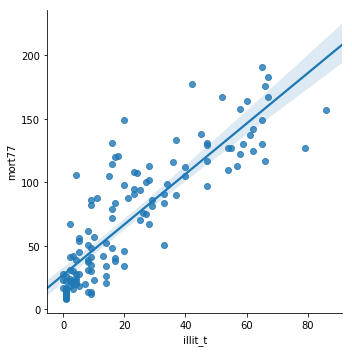

In [94]:
sns.lmplot(x='illit_t', y='mort77',data=wbdr,fit_reg=True)

(f) 總結來說，我們可以發現GDP所得越高，會讓不識字率降低
GDP所得越高，會讓嬰兒死亡率降低
而不識字率和嬰兒死亡率 有正相關
背後可能的原因故事為：1.因為所得越高，就越有機會受教育，因此不識字的比率就會隨之降低
2.因為所得越高，可以讓衛生醫療更好 醫院更多，因此嬰兒死亡率就會隨之降低

### Question 6

In [95]:
# read data into a DataFrame
mlb = pd.read_stata('MLB1.DTA')

In [96]:
mlb.head(10)

,salary,teamsal,nl,years,games,atbats,runs,hits,doubles,triples,...,runsyr,percwhte,percblck,perchisp,blckpb,hispph,whtepw,blckph,hisppb,lsalary
0,6329213.0,38407380.0,1,12,1705,6705,1076,1939,320,67,...,89.666664,70.277969,18.844229,10.877804,0.000000,0.000000,70.277969,0.000000,0.000000,15.660686
1,3375000.0,38407380.0,1,8,918,3333,407,863,156,38,...,50.875000,70.277969,18.844229,10.877804,18.844229,0.000000,0.000000,10.877804,0.000000,15.031906
2,3100000.0,38407380.0,1,5,751,2807,370,840,148,18,...,74.000000,70.277969,18.844229,10.877804,0.000000,0.000000,70.277969,0.000000,0.000000,14.946913
3,2900000.0,38407380.0,1,8,1056,3337,405,816,143,18,...,50.625000,70.277969,18.844229,10.877804,0.000000,0.000000,70.277969,0.000000,0.000000,14.880221
4,1650000.0,38407380.0,1,12,1196,3603,437,928,19,16,...,36.416668,70.277969,18.844229,10.877804,18.844229,0.000000,0.000000,10.877804,0.000000,14.316286
5,700000.0,38407380.0,1,17,2032,7489,1136,2145,270,142,...,66.823532,70.277969,18.844229,10.877804,18.844229,0.000000,0.000000,10.877804,0.000000,13.458836
6,695000.0,38407380.0,1,4,394,1293,179,303,51,13,...,44.750000,70.277969,18.844229,10.877804,0.000000,10.877804,0.000000,0.000000,18.844229,13.451667
7,275000.0,38407380.0,1,10,432,1005,78,240,35,5,...,7.800000,70.277969,18.844229,10.877804,0.000000,0.000000,70.277969,0.000000,0.000000,12.524527
8,235000.0,38407380.0,1,4,223,491,37,118,16,5,...,9.250000,70.277969,18.844229,10.877804,0.000000,10.877804,0.000000,0.000000,18.844229,12.367341
9,212500.0,38407380.0,1,3,156,434,45,116,16,0,...,15.000000,70.277969,18.844229,10.877804,18.844229,0.000000,0.000000,10.877804,0.000000,12.266697


In [97]:
mlb.columns

Index(['salary', 'teamsal', 'nl', 'years', 'games', 'atbats', 'runs', 'hits',
       'doubles', 'triples', 'hruns', 'rbis', 'bavg', 'bb', 'so', 'sbases',
       'fldperc', 'frstbase', 'scndbase', 'shrtstop', 'thrdbase', 'outfield',
       'catcher', 'yrsallst', 'hispan', 'black', 'whitepop', 'blackpop',
       'hisppop', 'pcinc', 'gamesyr', 'hrunsyr', 'atbatsyr', 'allstar',
       'slugavg', 'rbisyr', 'sbasesyr', 'runsyr', 'percwhte', 'percblck',
       'perchisp', 'blckpb', 'hispph', 'whtepw', 'blckph', 'hisppb',
       'lsalary'],
      dtype='object')

In [99]:
#(a)
results3 = smf.ols(formula='np.log(salary) ~ years + gamesyr + bavg + hrunsyr + rbisyr', data=mlb).fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     117.1
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           2.94e-72
Time:                        01:07:04   Log-Likelihood:                -385.11
No. Observations:                 353   AIC:                             782.2
Df Residuals:                     347   BIC:                             805.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1924      0.289     38.752      0.0

the variables that are statistical significant: Intercept,years,gamesyr

(b) gamesyr is significance at 1% level

In [100]:
#(c)
results4 = smf.ols(formula='np.log(salary) ~ years + gamesyr + bavg + hrunsyr', data=mlb).fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     145.2
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           6.98e-73
Time:                        01:10:53   Log-Likelihood:                -386.25
No. Observations:                 353   AIC:                             782.5
Df Residuals:                     348   BIC:                             801.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.0209      0.266     41.476      0.0

the statistical significance of hrunsyr increase p-value 變成0
the size of the coefficient on hrunsyr 也從原本的0.0144 增加到 0.0359
可能的解釋為：hrunsyr 和 rbisyr 兩者有相關性 而且皆對薪水有影響，故如果加入 rbisyr 跑迴歸的話，就會讓 hrunsyr 的係數減少，且變得較不顯著

In [101]:
#(d)
results5 = smf.ols(formula='np.log(salary) ~ years + gamesyr + bavg + hrunsyr + rbisyr + runsyr + fldperc + sbasesyr', data=mlb).fit()
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     76.18
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           1.63e-71
Time:                        08:56:59   Log-Likelihood:                -379.61
No. Observations:                 353   AIC:                             777.2
Df Residuals:                     344   BIC:                             812.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4929      2.015      5.207      0.0

factors are individually significant: runsyr 

(e) 
i. Warning 001: potential heteroscedasticity issues
可能的原因為：標準差是heteroscedasticity 不是同質性，應該要用robust std 去跑迴歸
ii. Warning 002: your model may subject to some endogeneity problems
原因為：有變數內生性的問題，也就是 遺漏變數的問題存在，也就是解釋變量與誤差項存在相關性，此時我們應該仔細思考是否遺漏什麼變數去跑回歸，並加入回歸以避免此問題